## Problem Statement:-
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

#### About the data: 
#### Let’s consider a Company dataset with around 10 variables and 400 records. 
#### The attributes are as follows: 
####  Sales -- Unit sales (in thousands) at each location
####  Competitor Price -- Price charged by competitor at each location
####  Income -- Community income level (in thousands of dollars)
####  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
####  Population -- Population size in region (in thousands)
####  Price -- Price company charges for car seats at each site
####  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
####  Age -- Average age of the local population
####  Education -- Education level at each location
####  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
####  US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
company = pd.read_csv(r'C:\DS Assignments\Assignment 14(Decision Trees)\Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


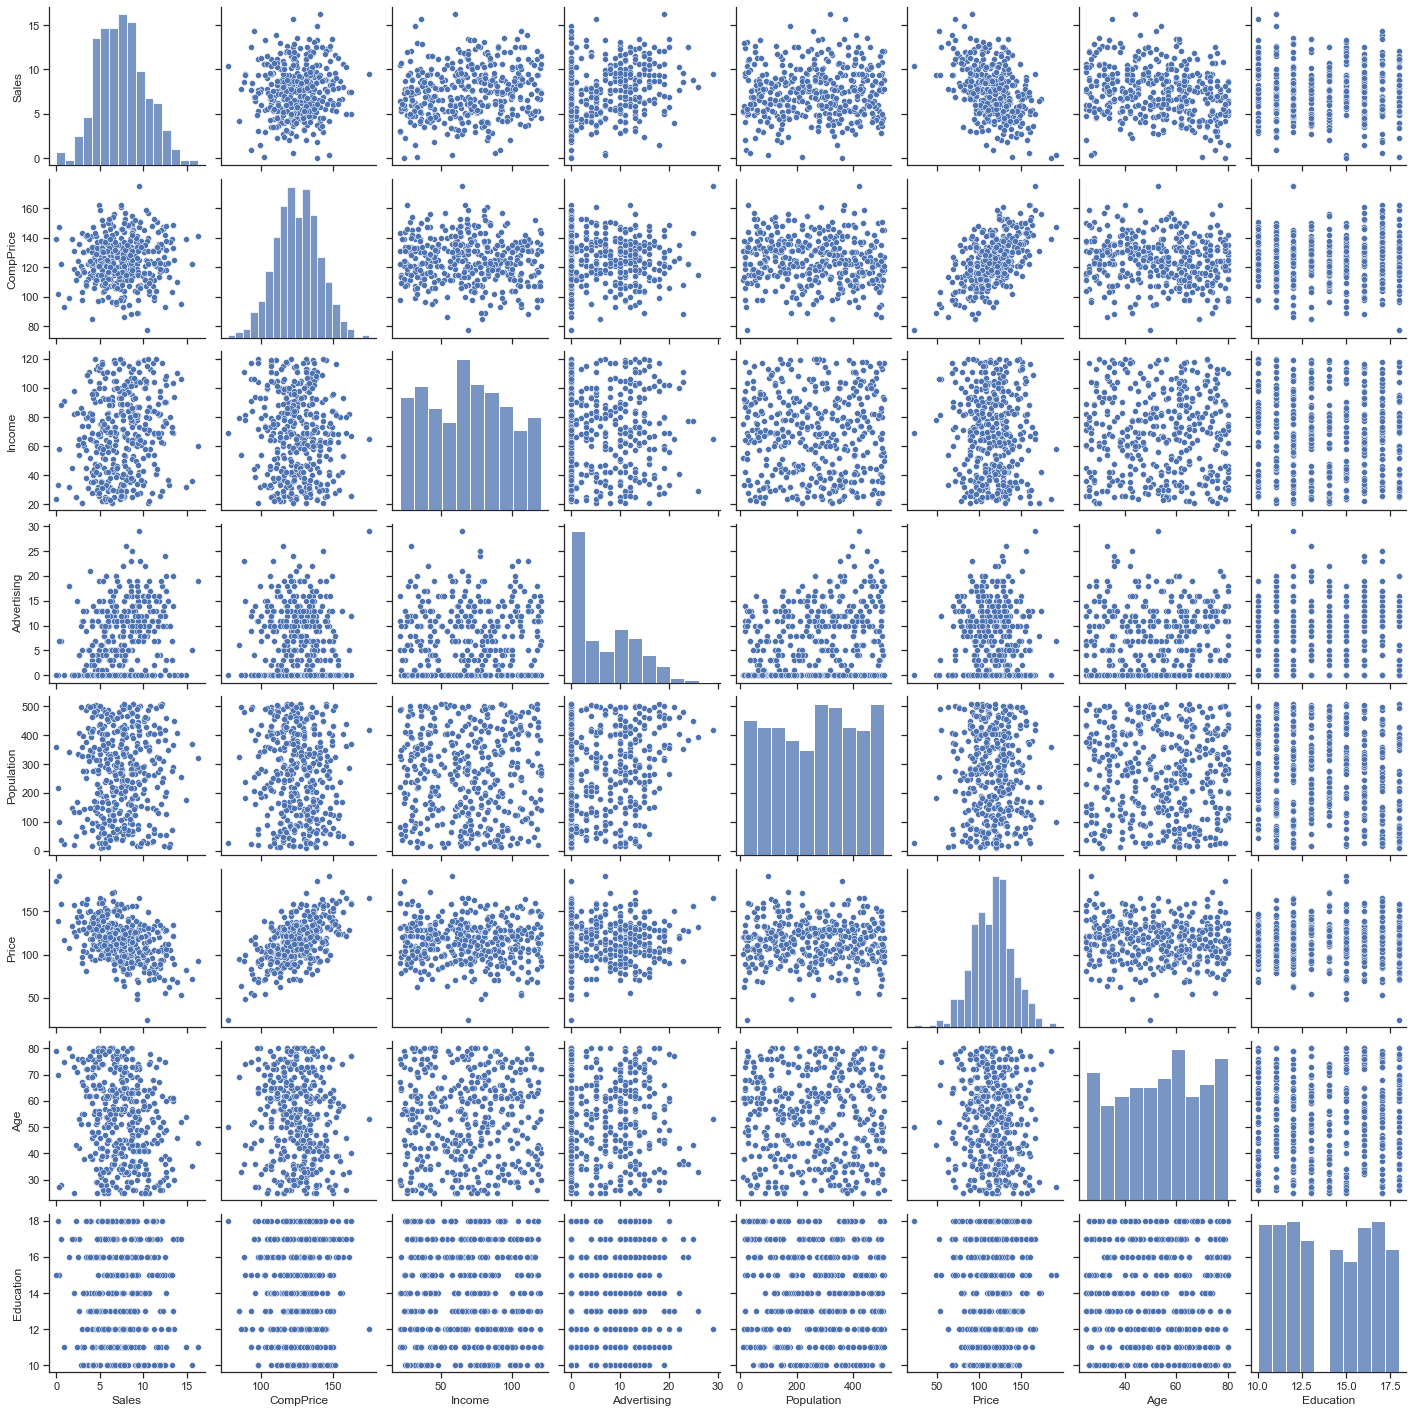

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.pairplot(company)


In [7]:
comp1 = company.copy()

## Independent Variable

In [8]:
compX = comp1.iloc[:,1:]
compX

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
compX['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [10]:
compX['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
compX['US'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# It will exclude original categorical columns and will include only included columns having dummy values. 
compX_encoded = pd.get_dummies(compX, columns = ['ShelveLoc', 'Urban', 'US'])
compX_encoded.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


## Dependent variable

In [13]:
comp1['Sales'].max()

16.27

In [14]:
comp1['Sales'].min()

0.0

In [15]:
comp1['Sales'].median()

7.49

In [16]:
comp1['Sales'].mean()

7.496325

In [17]:
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
comp1.loc[comp1["Sales"] <= 10.00,"Sales1"]="Not High"
comp1.loc[comp1["Sales"] >= 10.01,"Sales1"]="High"
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High


In [19]:
comp1['Sales1'].unique()

array(['Not High', 'High'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb = LabelEncoder()

In [22]:
compY = lb.fit_transform(comp1.Sales1)

In [23]:
compY.shape

(400,)

In [24]:
compY

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [25]:
comp1['Sales1'].value_counts()

Not High    322
High         78
Name: Sales1, dtype: int64

In [26]:
compX_encoded.shape

(400, 14)

## Building Preliminary Classification Tree

In [27]:
X_train, X_test, y_train, y_test = train_test_split(compX_encoded, compY, test_size = 0.3, random_state=40)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 14), (280,), (120, 14), (120,))

In [29]:
clfdf = DecisionTreeClassifier(random_state = 40)

In [30]:
clfdf = clfdf.fit(X_train, y_train)

## Plotting Decision Tree

In [31]:
from sklearn import tree

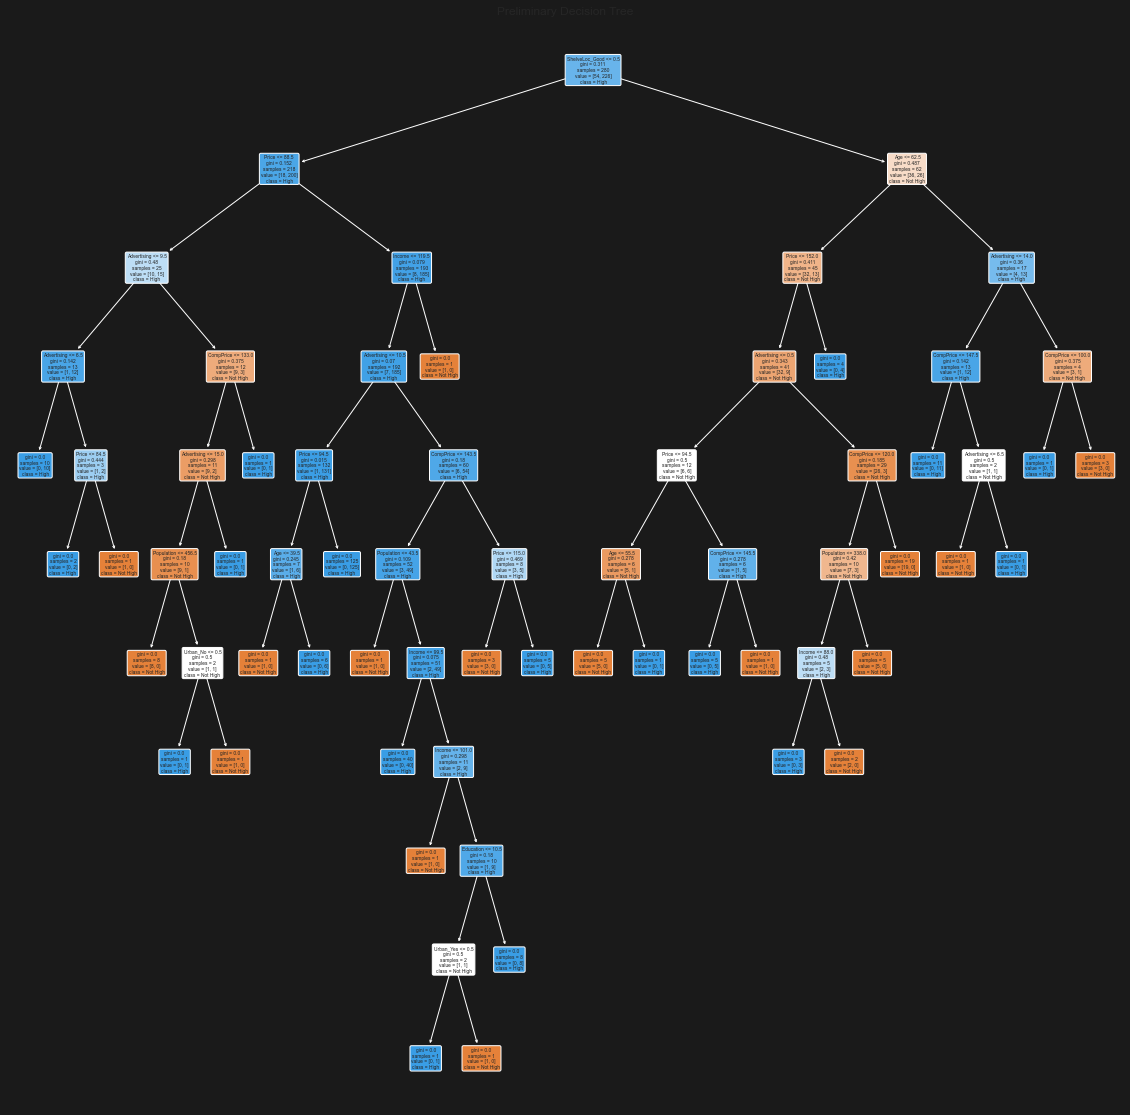

In [32]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20), facecolor='k')
tree.plot_tree(clfdf, rotate=True, ax=ax,
               filled = True,
               rounded = True,
               class_names = ['Not High', 'High'],
               feature_names = compX_encoded.columns)
plt.title('Preliminary Decision Tree')
plt.show()

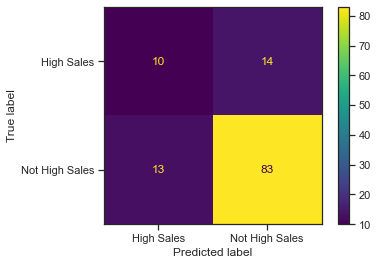

In [33]:
plot_confusion_matrix(clfdf, X_test, y_test, display_labels = ['High Sales', 'Not High Sales'])

In [34]:
clfdf.score(X_test, y_test)

0.775

## Balancing Data : SMOTE

In [35]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

In [ ]:
## Prunning Decision Tree
#### Cost Complexitiy Prunning Part 1 : Visualizing alpha

In [ ]:
path = clfdf.cost_complexity_pruning_path(X_train_smote, y_train_smote)

In [ ]:
ccp_alphas = path.ccp_alphas

In [ ]:
ccp_alphas = ccp_alphas[:-1] # Excluding max value of alpha

In [ ]:
clfdfs = []

for ccp_alpha in ccp_alphas:
clfdf = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)
clfdf.fit(X_train_smote, y_train_smote)
 clfdfs.append(clfdf)

In [ ]:
# Now get the accuracy of tree using training and testing datasets as function of alpha
train_score = [clfdf.score(X_train_smote, y_train_smote) for clfdf in clfdfs]

In [ ]:
test_score = [clfdf.score(X_test, y_test) for clfdf in clfdfs]

In [ ]:
fig, ax = plt.subplots()
#ax.set_xlable('alpha')
#ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, train_score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

### Cross Validation for finding best Alpha value

In [ ]:
clfdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = 0.002)

In [ ]:
scores = cross_val_score(clfdt, X_train_smote, y_train_smote, cv = 5)

In [ ]:
df = pd.DataFrame( data = {'tree' : range(5), 'accuracy' : scores })

In [ ]:
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [ ]:
#REPEATING ABOVE STEPS

alpha_loop_val = []
for ccp_alpha in ccp_alphas:
cftdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)

In [ ]:
alpha_result = pd.DataFrame(alpha_loop_val,
 columns = ['alpha', 'mean_accuracy', 'std'] )

In [ ]:
alpha_result.plot( x = 'alpha',
 y = 'mean_accuracy',
 yerr = 'std',
 marker = 'o',
 linestyle = '--')

#### Here we can see alpha value near to 0.0040 is giving better accuracy

In [ ]:
# Finding the closest value which will give better accuracy
alpha_result[(alpha_result['alpha'] > 0.0038) & alpha_result['alpha'] < 0.0043]

In [ ]:
ideal_alpha = alpha_result[(alpha_result['alpha'] > 0.0038) & alpha_result['alpha'] < 0.0043]['alpha']

In [ ]:
ideal_alpha

In [ ]:
ideal_alpha = np.mean(ideal_alpha)
ideal_alpha

## Final Decision Tree Classifier

In [ ]:
clf_final = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 6, random_state = 40, ccp_alpha = ideal_alpha)

In [ ]:
clf_final.fit(X_train_smote, y_train_smote)

In [ ]:
plot_confusion_matrix(clf_final, X_test, y_test, display_labels = ['High Sales', 'Not High Sales'])

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20), facecolor='k')
tree.plot_tree(clf_final, rotate=True, ax=ax,
               filled = True,
               rounded = True,
               class_names = ['Not High', 'High'],
               feature_names = compX_encoded.columns)
plt.title('Preliminary Decision Tree')
plt.show()

In [ ]:
clf_final.score(X_test, y_test)

#### Hence, we have prunned the decision tree from level 11 to level 6 by balancing the dataset, and thus have built a Decision Tree Classifier which specifies the attributes causing high sales.